In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path
import math
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import convert_age_from_days_to_years, extractqrcode, draw_age_distribution, calculate_code_age_distribution

### Total no. of artifacts in dataset

In [2]:
DATASET_PATH = Path('/mnt/omdena_dataset/95k_depthmap_trainingdata')

In [3]:
artifacts = pd.read_csv(DATASET_PATH / 'labels/training.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 96026


,artifact,storage_path,height,weight,key,age
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
1,pc_1583438052-nxew87bcv0_1591122011044_100_004.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
2,pc_1583438052-nxew87bcv0_1591122011044_100_005.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
3,pc_1583438052-nxew87bcv0_1591122011044_100_006.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260
4,pc_1583438052-nxew87bcv0_1591122011044_100_007.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260


In [4]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(convert_age_from_days_to_years, axis=1)
artifacts.head()

,artifact,storage_path,height,weight,key,age,Years
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
1,pc_1583438052-nxew87bcv0_1591122011044_100_004.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
2,pc_1583438052-nxew87bcv0_1591122011044_100_005.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
3,pc_1583438052-nxew87bcv0_1591122011044_100_006.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3
4,pc_1583438052-nxew87bcv0_1591122011044_100_007.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.3,100,1260,3


In [29]:
artifacts_new = artifacts.loc[artifacts['Years'] != 50]
artifacts_update = artifacts_new.loc[artifacts_new['Years'] != 6]
artifacts_update['key'].value_counts()

101    39007
100    24852
102    23272
202     6348
201     1266
200     1113
Name: key, dtype: int64

### Total no. of children in the dataset

In [17]:
artifacts['qrcode'] = artifacts.apply(extractqrcode, axis=1)
scans = artifacts.drop_duplicates(subset='qrcode', keep='first')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 4858


,artifact,storage_path,height,weight,key,age,Years,qrcode
0,pc_1583438052-nxew87bcv0_1591122011044_100_000.p,qrcode/1583438052-nxew87bcv0/measure/159112201...,86.6,10.30,100,1260,3,1583438052-nxew87bcv0
11,pc_1583438084-zkafuhr4xx_1591122031563_100_000.p,qrcode/1583438084-zkafuhr4xx/measure/159112203...,104.4,14.80,100,1283,4,1583438084-zkafuhr4xx
24,pc_1583438117-71v1y4z0gd_1592711198959_100_000.p,qrcode/1583438117-71v1y4z0gd/measure/159271119...,104.1,14.75,100,1398,4,1583438117-71v1y4z0gd
33,pc_1583438117-spfyeecneo_1591122016705_100_000.p,qrcode/1583438117-spfyeecneo/measure/159112201...,98.3,12.55,100,1640,4,1583438117-spfyeecneo
48,pc_1583438127-xt6z0e0tsu_1591122024547_100_000.p,qrcode/1583438127-xt6z0e0tsu/measure/159112202...,89.7,11.50,100,140,0,1583438127-xt6z0e0tsu


0     889
1     785
2     712
3     895
4     974
5     587
6       1
50     15
Name: Years, dtype: int64


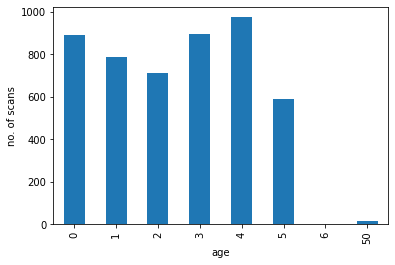

In [18]:
plt.figure()
draw_age_distribution(scans)
plt.show()

101    39059
100    24872
102    23301
202     6378
201     1292
200     1124
Name: key, dtype: int64


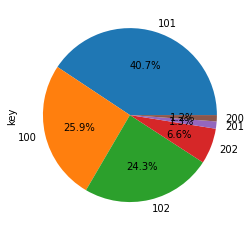

In [16]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
_ = artifacts['key'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.savefig('training_data_distribution.png')

In [8]:
calculate_code_age_distribution(artifacts)

,0,1,2,3,4
codes,,,,,
100,5023,512,3312,5536,6564
101,7550,779,3705,9142,11086
102,4825,477,2723,5134,6230
200,80,857,162,0,7
201,163,883,201,8,0
202,622,4662,984,59,14


In [9]:
calculate_code_age_distribution(scans)

,0,1,2,3,4
codes,,,,,
100,671,75,492,793,901
101,67,17,37,51,46
102,57,14,37,42,25
200,10,106,20,0,1
201,11,54,15,1,0
202,73,519,111,8,1


### Distribution of height, weight and age against each other

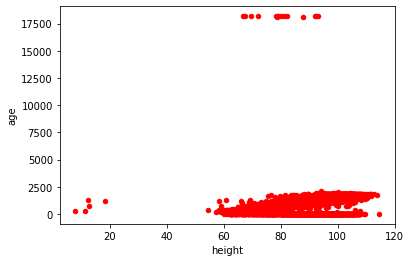

In [10]:
#distribution of height against age
height_vs_age = scans.plot.scatter(x='height', y='age', c='red')

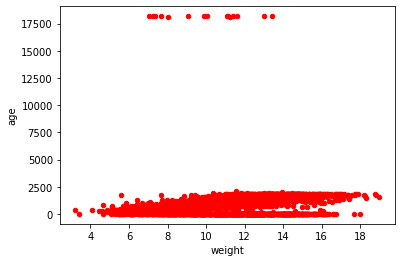

In [11]:
#distribution of weight against age
weight_vs_age = scans.plot.scatter(x='weight', y='age', c='red')

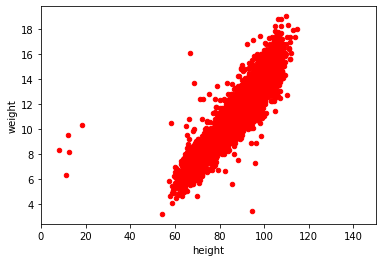

In [14]:
## distribution of height against weight
weight_vs_height = scans.plot.scatter(x='height', y='weight', c='red')
plt.xlim([0, 150])
plt.savefig('HvW_training.png')